In [1]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers
from tensorflow.keras.callbacks import History 
import matplotlib.pyplot as plt

class Model:
    def __init__(self):
        # reshape tensors, reduce magnitude of elements in tensors
        self.X_train = []
        self.y_train = []
        self.X_test = []
        self.y_test = []
        self.data = History()

        network = models.Sequential() # construction of neural network
        network.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (32, 32, 3))) # input layer, convolution for feature extraction
        network.add(layers.MaxPool2D((2,2))) # max pool to filter/enhance feature extractions
        network.add(layers.Conv2D(128, (3,3), activation = 'relu'))
        network.add(layers.MaxPool2D((2,2)))
        network.add(layers.Conv2D(128, (3,3), activation = 'relu'))
        network.add(layers.MaxPool2D((2,2)))
        network.add(layers.Flatten()) # flatten for tensors to be moved into dense layers
        network.add(layers.Dense(64, activation = 'relu'))
        network.add(layers.Dense(64, activation = 'relu'))
        network.add(layers.Dense(10, activation = 'softmax')) # softmax activation for multiclass single-label classification

        self.network = network

    def fit(self, X_train, y_train, X_test, y_test, train_reshape, test_reshape):
        self.X_train = X_train.reshape(train_reshape) 
        self.X_train = self.X_train.astype('float32')/255
        self.X_test = X_test.reshape(test_reshape)
        self.X_test = self.X_test.astype('float32')/255
        
        
        self.y_train = to_categorical(y_train) 
        self.y_test = to_categorical(y_test)

        # compile the network 
        self.network.compile(optimizer = 'rmsprop', # a standard optimizor
                        loss = 'categorical_crossentropy',  # loss function for multiclass single-label classification
                        metrics = ['accuracy'])
        # Fit the data through the network, 
        self.data = self.network.fit(self.X_train, self.y_train, epochs = 8, batch_size = 75, validation_data = (self.X_test, self.y_test))

    def display_fitting(self):
        # construct pyplot to compare training accuracy and validation accuracy
        plt.plot(range(1, len(self.data.history['accuracy']) + 1), self.data.history['accuracy'], label = 'Training Accuracy')
        plt.plot(range(1, len(self.data.history['val_accuracy']) + 1), self.data.history['val_accuracy'], label = 'Validation Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

Epoch 1/8
667/667 [==============================] - 270s 399ms/step - loss: 1.7027 - accuracy: 0.3776 - val_loss: 1.4640 - val_accuracy: 0.4798
Epoch 2/8
667/667 [==============================] - 262s 392ms/step - loss: 1.2327 - accuracy: 0.5658 - val_loss: 1.1989 - val_accuracy: 0.5750
Epoch 3/8
667/667 [==============================] - 273s 410ms/step - loss: 1.0204 - accuracy: 0.6466 - val_loss: 1.0003 - val_accuracy: 0.6519
Epoch 4/8
667/667 [==============================] - 267s 401ms/step - loss: 0.8782 - accuracy: 0.6967 - val_loss: 1.0628 - val_accuracy: 0.6342
Epoch 5/8
667/667 [==============================] - 273s 410ms/step - loss: 0.7761 - accuracy: 0.7309 - val_loss: 1.0949 - val_accuracy: 0.6392
Epoch 6/8
667/667 [==============================] - 272s 408ms/step - loss: 0.6896 - accuracy: 0.7596 - val_loss: 0.9828 - val_accuracy: 0.6714
Epoch 7/8
667/667 [==============================] - 265s 398ms/step - loss: 0.6161 - accuracy: 0.7860 - val_loss: 0.9381 - val_ac

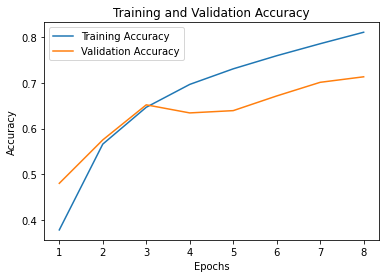

In [2]:
(trainImages, trainLabels), (testImages, testLabels) = cifar10.load_data()
model = Model()
model.fit(trainImages, trainLabels, testImages, testLabels, (50000, 32, 32, 3), (10000, 32, 32, 3))
model.display_fitting()